### Trabajo Final Master Ciencia de Datos y Business Analytics
## Reporte Laboratorio Seco - Análisis del Juego de Datos y Composición y Estructura de Datos
*Fecha Ultima Actualización* Agosto 2023

# Introducción
El siguiente reporte de laboratorio seco es el análisis preliminar de los juegos de datos utilizados en el TFM. El objetivo de dicho análisis es familiarizarse con la data y conocer de antemano cualquier problema o situación que amerite ajustes, cambios o ediciones al juego de datos. La empresa Northbay International entregó cinco archivos diferentes, uno por cada año de información del punto de venta recibida por los clientes. Los archivos se dividieron en cinco porque la base de datos Oracle 12C tuvo problemas exportando los cinco años en un solo archivo. 

Los archivos recibidos son:

1. `retail_ventas_2018_4327905.txt`
2. `retail_ventas_2019_4022432.txt`
3. `retail_ventas_2020_2572276.txt`
4. `retail_ventas_2021_3721009.txt`
5. `retail_ventas_2022_4224913.txt`
6. `retail_ventas_2023_1782196.txt`

Se mencionó cinco archivos aunque se listan seis. El archivo del año 2023 se recibe incompleto y con serias dudas de su utilidad. Adicionalmente el equipo de planificación advirtió que los archivos pueden contener información de nuevos clientes a medida que se aumentaba la capacidad de proceso de la división, por lo que el crecimiento en las ventas puede estar motivado no por un crecimiento de un cliente en particular, sino por el aumento del recaudo de la información de nuevos clientes. 

# Lectura Inicial y Reconocimiento del Juego de Datos
Se procedió a leer el primer archivo (el correspondiente a los datos del año 2018 con etiqueta `retail_ventas_2018_4327905.txt`) para conocer sus dimensiones y componentes.  

In [1]:
import pandas as pd
csv_file_path = 'data_raw/retail_ventas_2018_4327905.txt'
encoding = 'latin1'
df = pd.read_csv(csv_file_path, encoding=encoding)

/var/folders/9c/f5lf7vz91zs8mwbnjbtxzjgw0000gn/T/ipykernel_6911/3445108827.py:4: DtypeWarning: Columns (2,7,8,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, encoding=encoding)


El primer mensaje de error al leer el archivo tiene que ver con datos mixtos en las columnas 2, 7, 8 y 19. Conociendo de antemano la falta de una política de gobierno de datos, y los problemas que ha tenido el departamento de planificación logrando que los clientes normalicen su data, esto no es de sorprender. Para entender un poco mejor la condición del juego de datos, ahondamos en su composición, variables y dimensión. 

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327905 entries, 0 to 4327904
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   GRUPO                 int64  
 1   NO_CLIENTE            object 
 2   SUCURSAL              object 
 3   FECHA                 object 
 4   CODIGO_MARCA          float64
 5   NOMBRE_MODELO         object 
 6   COLOR                 object 
 7   TALLA                 object 
 8   UPC                   object 
 9   PRECIO_INV            float64
 10  PRECIO_VTA            float64
 11  CANTIDAD              int64  
 12  CODIGO_TEMP           object 
 13  CODIGO_COLOR          float64
 14  VALIDO                object 
 15  TASA_CAMBIO           float64
 16  USER_CREA             object 
 17  FECHA_CREA            object 
 18  EAN_COLOR             float64
 19  MODELO                object 
 20  TMP_ID                float64
 21  VENTAS                float64
 22  COSTO                 float64
 23  DEPT   

En total podemos ver que el archivo del año 2018 tiene 4,327,904 registros, cada uno con 27 columnas de diferentes datos. Muchas de las variables son conocidas de la charla exploratoria con el grupo de planificación de la empresa, pero muchas otras deben ser corroboradas para poder entender el alcance total de los datos. Una mejor forma de explorar los mismos es viendo uno ejemplo concreto de los campos. 

In [3]:
# revisar un registro en particular
first_row_vertically = df.head(1).transpose()
print(first_row_vertically)

                                             0
GRUPO                                       20
NO_CLIENTE                              02-072
SUCURSAL                                   NC2
FECHA                               01/31/2018
CODIGO_MARCA                             789.0
NOMBRE_MODELO                       905653-010
COLOR                                  BLK/WHT
TALLA                                      NaN
UPC                                        NaN
PRECIO_INV                                 0.0
PRECIO_VTA                                60.0
CANTIDAD                                     1
CODIGO_TEMP                               HO17
CODIGO_COLOR                               NaN
VALIDO                                       N
TASA_CAMBIO                                1.0
USER_CREA                             SACEVEDO
FECHA_CREA            10/07/2019 3:27:01 p. m.
EAN_COLOR                                  NaN
MODELO                              905653-010
TMP_ID       

## Análisis y Relevamiento del Juego de Datos
Después de haber hablado con el equipo de planificación, una de las sensaciones del alumno fue que el mismo tiene más datos de los que puede procesar, o de los que puede usar con utilidad en el momento. El equipo de planificación se quejó varias veces de lo molesto que es analizar la data de un cliente para un año particular por lo voluminosa, pero el alumno, al ver el juego de datos, teoriza que muchos de los datos incluidos tienen mucho sentido en un ERP, pero muy poco para el análisis de pronósticos de series de tiempo. Es por eso que se procede a explicar cada variable, una por una, y crear un análisis de viabilidad de las mismas (si conviene mantenerlas o eliminarlas y reducir la complejidad del juego de datos). 

### Variable GRUPO
La variable `GRUPO` es una clave legado del sistema ERP de Northbay, que califica a los clientes como nacionales (con clave 10) o extranjeros (con clave 20).

In [4]:
df['GRUPO'].describe()

count    4327905.0
mean          20.0
std            0.0
min           20.0
25%           20.0
50%           20.0
75%           20.0
max           20.0
Name: GRUPO, dtype: float64

La única razón de esto es para que el sistema ERP pueda diferenciar entre clientes que nacionalizan su producto dentro de la República de Panamá y deben pagar ITBM (impuesto a la transferencia de bienes muebles del 7%) o no. Las ventas al extranjero se hacen a través de la Zona Libre de Colón, que exporta libre de impuestos y cuyas ventas no pagan impuesta sobre las ganancias, ende la importancia de la diferenciación. 

Sin embargo, para el sistema de pronóstico esto tiene poco futuro como regresor, y su importancia es mínimo, por lo que se decide eliminar la columna del juego de entrenamiento.

### Variable NO_CLIENTE
La variable `NO_CLIENTE` es el número del cliente, aunque no es necesariamente un número. 

In [5]:
df['NO_CLIENTE'].describe()

count     4327905
unique         51
top       10-2672
freq       811033
Name: NO_CLIENTE, dtype: object

La variable es realmente una combinación de dos cifras que representan el número del país del cliente, un guión, y un número aleatorio que es en teoría el número del cliente en el país. Esta clave es importante para identificar la data de un cliente en cuestión y poder utilizarla para entrenar el pronóstico. El alumno también piensa que el número que identifica el país pudiera ser interesante como regresor en un sistema futuro, pero dado la falta de consistencia en los datos en la base de datos actual, su uso debe analizarse con mucho más detenimiento. 

### Variable SUCURSAL
En teoría la variable `SUCURSAL` identifica una puerta diferente de un cliente en particular. Por ejemplo, un cliente puede comprar para más de un establecimiento y solicitar que el pedido se divida de alguna manera en diferentes porciones. De la misma manera, la data de los sistemas POS diferencia que sucursal vendió que mercancía. 

In [6]:
df['SUCURSAL'].describe()

count     4327905
unique        321
top             2
freq       138280
Name: SUCURSAL, dtype: int64

El problema con la variable `SUCURSAL` es la inconsistencia. Algunos clientes tienen sucursales, algunos no. Algunos clientes tienen sucursales pero reportan su data como si no la tuvieran. Otros al actualizar sus sistemas cambian de forma imprevista los números de las sucursales, perdiendo cualquier orden o secuencia en las ventas. Por la ambiguedad de la variable, se decide eliminarla del juego de datos, ya que no aporta un valor tangible por la falta de reglas al implementarla. 

### Variable FECHA
La variable fecha es una de las más importantes en el juego de datos, ya que estamos frente a datos que conforman una serie de tiempo. Sin embargo, en su estado natural, Python leen la columna de fecha como un objeto, y no como una estructura de fecha. Esto de por si no debiera ser un problema difícil de solventar.

In [7]:
df['FECHA'].describe()

count        4327905
unique           365
top       12/30/2018
freq           51870
Name: FECHA, dtype: object

Un rápida vista al juego de datos revela 365 valores únicos, lo que no es de sorprender, tratandose de fechas en un año normal (no bisiesto). 

### Variable CODIGO_MARCA
La variable marca puede asumir tres valores: _456_ para el calzado, _789_ para la ropa, y _790_ para todo lo concerniente a equipo. Es en realidad la etiqueta que diferencia las unidades de negocio.  

In [8]:
df['CODIGO_MARCA'].describe()

count    4.287876e+06
mean     6.426613e+02
std      1.656439e+02
min      4.560000e+02
25%      4.560000e+02
50%      7.890000e+02
75%      7.890000e+02
max      7.970000e+02
Name: CODIGO_MARCA, dtype: float64

La variable se ha archivado como un número real, y en realidad pudiera ser sustituido por un rango amplio de otras etiquetas que hagan más fácil reconocer que tipo de producto se trata. 

### Variable NOMBRE_MODELO
La variable nombre modelo debe contener el nombre del producto, pero al ver varios ejemplos, vemos que contiene el código del producto por alguna razón. 

In [9]:
df['NOMBRE_MODELO'].describe()

count        4327875
unique         22981
top       884581-394
freq           10044
Name: NOMBRE_MODELO, dtype: object

In [10]:
df['NOMBRE_MODELO'].tail()

4327900    BV8016-445
4327901    AH6803-003
4327902    685153-100
4327903    AO2604-600
4327904    807471-103
Name: NOMBRE_MODELO, dtype: object

In [11]:
df['NOMBRE_MODELO'].head()

0    905653-010
1    905653-010
2    905653-429
3    907254-001
4    907254-400
Name: NOMBRE_MODELO, dtype: object

Para complicar de por si lo contraintuitivo del nombre de la variable, algunos códigos son numéricos, otros alfanuméricos. Es interesante guardar esta información en nuestro datamart para referencia futura, ya que puede ser útil si se quisieran construir modelos predictivos para productos específicos (por ejemplo, modelo predictivo para el producto BV8016-445).

### Variable COLOR
Cómo lo indica su nombre, esta variable acumula el color del producto. 

In [12]:
df['COLOR'].describe()

count     4102031
unique      32883
top         BLACK
freq       807014
Name: COLOR, dtype: object

In [13]:
df['COLOR'].head()

0       BLK/WHT
1       BLK/WHT
2    BINBLU/WHT
3     BK/WH/VLT
4       RYL/SIL
Name: COLOR, dtype: object

In [14]:
df['COLOR'].tail()

4327900       NAVY
4327901      BLACK
4327902      WHITE
4327903    HT PNCH
4327904      WHITE
Name: COLOR, dtype: object

La utilidad del color en el modelo de predicción es cuestionable, ya que diferentes clientes utilizan diferentes formas de guardar el color. Por ejemplo, algunos clientes utilizan 'BLACK' para el color negro, y otros 'BLK'. Adicionalmente, los colores NIKE están codificados en los últimos tres digitos del código, lo que hace más sencillo volver a construir la columna de colores (correctamente) utilizando el código versus lo que los diferentes clientes, cada uno utilizando su propio sistema, usó. 

### Variable TALLA
La variable TALLA es la talla del producto. Luego de hablar con el equipo de planificación, la predicción de la talla que mejor se va a vender (y la predicción de _out-of-stock_ de tallas) pareciera ser uno de los problemas más críticos de la industria. Sin embargo el uso de la talla como predictor se escapa del alcance del TFM, por lo que no se utilizará en el trabajo. 

In [15]:
df['TALLA'].describe()

count     2945709
unique        231
top             M
freq       461300
Name: TALLA, dtype: object

In [16]:
df['TALLA'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: TALLA, dtype: object

In [17]:
df['TALLA'].tail()

4327900    11.5
4327901       7
4327902      10
4327903      11
4327904     7.5
Name: TALLA, dtype: object

Adicionalmente, algunas tallas no figuran, otras aparecen como números, combinaciones antiguas, etc. Se puede ver la variedad de tallas con el siguiente comando:

In [18]:
df['TALLA'].unique()

array([nan, 'MISC', 'M', '9.5', '9', '5', '8', '7', '8.5', '10.5', '7.5',
       'XL', 'L', 'S', '6Y', 'XS', '11', '10', '6.5', '7C', '6', '5Y',
       '1.5Y', '5.5', '3Y', '34C', '4.5Y', '5.5Y', '4', '6.5Y', 'LG',
       '7Y', '25Y', '45Y', '12', '4Y', 'MU5', '10.5C', '12.5C', 'SL',
       '3.5Y', '32D', '32DD', '5C', '1Y', '2.5Y', '8C', '13C', '32B',
       '12C', '15Y', '11.5C', '11C', '35Y', '32C', '34B', '0', '55Y',
       '135C', '9C', '2Y', 'U', 'L/XL', 'LX', '36C', '34', '10C', '13.5C',
       '1', 'XXL', 'KU6', '13', 'MU7', '30', '6C', '34D', '36DD', 'MD',
       'LA-C', 'MA-C', 'SA-C', '0-3', 'MD-E', '36D', 'MM', 'U6', 'LD-E',
       '28', 'MA', '3', '10-12', '32', '8-9.5', '6-7.5', '12-13', '11.5',
       'S/M', 'SM', 'M-XL', '1SIZE', 'OS', 'GRLS', 'M/L', 'BOYS', '2XL',
       'PRO', 'L-T', 'M-L', '4XL-T', '4-5.5', 'L/X', 'M-T', '12-',
       'XSA-C', '12.5', '36', 'M-S', '3XL', 'CUST1', '4XL', '13.5Y', '38',
       '15', 'L-L', 'S-T', '32-32', '36-32', '34-32', '38-32', 'L-

### Variable UPC
La variable UPC guarda el valor del código de barra del producto (del inglés, __Universal Product Code__). Para propósitos del TFM, esta variable es inútil, y dado que el código del producto ya se acumula en los datos en bruto, vemos poco valor el guardar la variable en el juego de datos revisado. 

In [19]:
df['UPC'].describe()

count     2.817172e+06
unique    8.448100e+04
top       8.870000e+11
freq      1.337880e+05
Name: UPC, dtype: float64

In [20]:
df['UPC'].tail()

4327900    882801936432
4327901    887226243943
4327902    887232583033
4327903    191885361963
4327904    886691678670
Name: UPC, dtype: object

### Variable PRECIO_INV
La variable precio de inventario se utiliza solo en el caso del cliente Sportline America, y es una variable de costo. Respetando el acuerdo de uso de la base de datos, dicha variable será ignorada en el TFM. Notoriamente, esta variable aparece en negativo cuando se da el caso de una devolución.

In [21]:
df['PRECIO_INV'].describe()

count    4.327905e+06
mean     2.662860e+01
std      3.331801e+01
min     -4.223500e+02
25%      0.000000e+00
50%      1.995000e+01
75%      4.204000e+01
max      4.356100e+02
Name: PRECIO_INV, dtype: float64

### Variable PRECIO_VTA
La variable PRECIO_VTA es el precio de venta del artículo en cuestión. Al igual que la variable de costo de inventario, y por respecto a la información de la empresa, dicha variable será ignorada en el TFM, aunque en la vida real es de suponer que pudiera ser una variable regresora para el pronóstico (NOTA DEL ALUMNO: asumimos que el valor y las cantidades en unidades están seriamente correlacionadas, por lo que lo correcto no sería combinarlas en un modelo predictivo). 

In [22]:
df['PRECIO_VTA'].describe()

count    4.327905e+06
mean     4.421152e+01
std      3.193425e+01
min     -2.832000e+02
25%      2.116000e+01
50%      3.495000e+01
75%      5.995000e+01
max      8.963800e+02
Name: PRECIO_VTA, dtype: float64

### Variable CANTIDAD
La variable CANTIDAD representa la venta del artículo en unidades tal cual lo reportó el sistema POS del cliente. Esta cantidad puede ser un número negativo si el sistema ingreso al inventario una devolución. 

In [23]:
df['CANTIDAD'].describe()

count    4.327905e+06
mean     1.022307e+00
std      9.035935e-01
min     -2.990000e+02
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.990000e+02
Name: CANTIDAD, dtype: float64

In [24]:
df['CANTIDAD'].head()

0    1
1    2
2    4
3    3
4    1
Name: CANTIDAD, dtype: int64

Para el trabajo con series de tiempo de ventas, la variable _CANTIDAD_ es crítica, y forma parte del juego de datos a utilizar en el modelo de predicción. 

### Variable CODIGO_TEMP
La variable CODIGO_TEMP representan la temporada en la que se lanzó el producto. Por ejemplo, las zapatillas de la temporada primavera 2020 debieran tener la codificación SP20. 

In [25]:
df['CODIGO_TEMP'].describe()

count     3484834
unique         51
top          FA17
freq       581025
Name: CODIGO_TEMP, dtype: object

Sin embargo, un breve uso de la función `describe()` nos permite ver que no todo es tan fácil. En los cinco años de ventas que representan los datos debiera haber 20 temporadas representadas (cinco años, cuatro temporadas por año). Es de esperar que quizás exista producto antiguo de un año o dos pasados, elevando el número a 28 temporadas, pero 51 valores únicos no parece tener lógica. Para salir de la duda se devuelven todos los valores únicos. 

In [26]:
df['CODIGO_TEMP'].unique()

array(['HO17', 'FA17', 'SU17', 'HO16', 'SP17', 'FA16', 'SU16', 'HO15',
       'FA15', 'SP15', 'SP16', 'SU15', 'SU14', nan, 'HO14', 'SU18',
       'SP18', 'SU12', 'SP14', 'SP08', 'FA18', 'SU13', 'FA14', 'FA13',
       'FA12', 'HO18', 'SP19', 'SP13', 'HO11', 'HO13', 'FA10', '0',
       'SU11', 'HO12', 'SU19', 'FA11', 'FALL', 'SP11', 'FA19', 'HO19',
       'SU10', 'SP12', 'SP09', 'SU07', 'FA08', 'SP20', 'FY16', 'FY15',
       'FY13', 'FA7', 'FY14', 'OTRO'], dtype=object)

Vemos en el resultado varias instancias que nos llaman bastante la atención.

* Hay muchas instancias de `nan` o valores que no son númericos, a pesar que la variable es del tipo `object`.
* Hay valores como `SP08` que en teoría significa que en el 2018 se vendió producto del 2008 (posible pero poco probable).
* También vemos valores como `FY13` que es el año fiscal 2013, y no una temporada.

Cuando se le preguntó al equipo de planificación si había alguna manera de relacionar producto con temporada, la respuesta es que si, pero solo hay archivos a partir del 2018 (el año que se comenzó a juntar datos). Por otro lado, muchos productos son estables a lo largo del tiempo. Por ejemplo el zapato AF1, ha utilizado el mismo código 315122-111 desde el año 2000, lo que hace difícil trazar la temporada de producción. 

<AxesSubplot:>

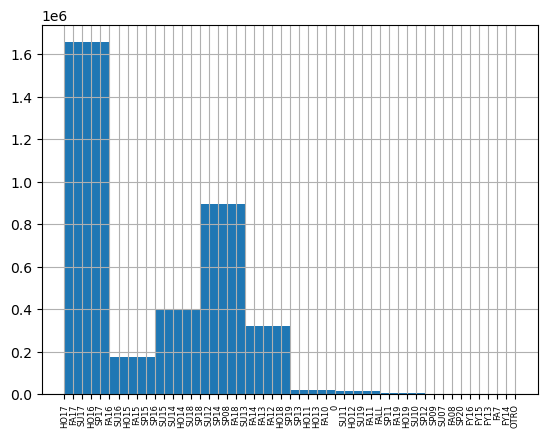

In [27]:
df['CODIGO_TEMP'].hist(xrot=90, xlabelsize=6)


Es la opinión del alumno que la temporada pudiera ser un regresor interesante de comenzar a tomar en serio y archivar adecuadamente. En el juego de datos actual, no hace mucho sentido utilizar la variable por la inconsistencia de los datos. 

### Variable CODIGO_COLOR
Llama la atención la columna CODIGO_COLOR, que parece ser la repetición de la columna COLOR. Lamentablemente al inspeccionar la columna, detectamos que está vacía, y debiera descartarse del todo. 

In [28]:
df['CODIGO_COLOR'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CODIGO_COLOR, dtype: float64

In [29]:
df['CODIGO_COLOR'].unique()

array([nan])

### Variable VALIDO
Nadie sabe que es la variable VALIDO. Uno de los programadores antiguos especula que puede haber sido una variable de prueba cuando los datos se cargaron a la base de datos Oracle 12C, pero nadie lo anotó o guardó en su momento para documentar el uso. La columna se trata de valores 'N'.

In [30]:
df['VALIDO'].describe()

count     4327905
unique          1
top             N
freq      4327905
Name: VALIDO, dtype: object

In [31]:
df['VALIDO'].unique()

array(['N'], dtype=object)

### Variable TASA_CAMBIO
La variable TASA_CAMBIO es la tasa de cambio de la moneda del país del cliente en el caso que los datos se reporten en moneda local y se necesiten pasar a la moneda neutral (en este caso el dólar, moneda de uso común en Panamá).

In [49]:
df['TASA_CAMBIO'].describe()

count    4.327905e+06
mean     5.605608e+02
std      1.141865e+03
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.108000e+01
max      3.270000e+03
Name: TASA_CAMBIO, dtype: float64

Esta variable funciona en combinación con la columna `VENTAS_MONEDA_ORIGEN`. 

### Variable USER_CREA
La variable USER_CREA registra en algunos casos cuales de los miembros del equipo de planificación subió a la base datos que información.

In [32]:
df['USER_CREA'].unique()

array(['SACEVEDO', 'LCUADRADO', 'LESLIEM', 'RDELAGUARDIA', 'AALONSO',
       'PPAREDES'], dtype=object)

Desde que la carga a Oracle 12C se automatizó, los datos suben siempre al sistema con la etiqueta 'LESLIEM' (el nombre de la jefa de programación Leslie Martinez).

### Variable FECHA_CREA
La variable FECHA_CREA es la fecha de creación de los datos. Esta fecha no corresponde con la fecha de la transacción, ya que ciertos clientes envian sus datos con regularidad, pero otros más pequeños acumulan varios meses de datos antes de mandarlos. Es una fecha de registro y bitácora. 

In [33]:
df['FECHA_CREA'].describe()

count                       4327905
unique                        13726
top       04/25/2019 10:32:15 a. m.
freq                            920
Name: FECHA_CREA, dtype: object

Al analizar la composición de los datos, vemos que el __timestamp__ es diferente a la fecha de transacción, ya que incluye hora (normal en el log de Oracle 12C).

### Variable EAN_COLOR
El equipo de planificación asume que la variable EAN_COLOR fue alguna solicitud de Sportline antes de pasarse al sistema SAP actual. Pero la columna no tiene datos almacenados actualmente.

In [34]:
df['EAN_COLOR'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: EAN_COLOR, dtype: float64

In [35]:
df['EAN_COLOR'].unique()

array([nan])

### Variable MODELO
La variable MODELO contiene el modelo de producto, pero en vez de un nombre se vuelve a repetir el código NIKE. 

In [36]:
df['MODELO'].describe()

count         830129
unique         19128
top       884581-394
freq            3307
Name: MODELO, dtype: object

In [37]:
df['MODELO'].head()

0    905653-010
1    905653-010
2    905653-429
3    907254-001
4    907254-400
Name: MODELO, dtype: object

In [38]:
df['MODELO'].tail()

4327900    NaN
4327901    NaN
4327902    NaN
4327903    NaN
4327904    NaN
Name: MODELO, dtype: object

### Variable TMP_ID
Muy similar a la variable VALIDO, nadie recuerda para qué se utiliza TMP_ID. Por el nombre asumimos que era una variable temporal, pero en los juegos de datos aparece la columna vacía.

In [39]:
df['TMP_ID'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: TMP_ID, dtype: float64

### Variable VENTAS
La variable VENTAS es la extensión de las ventas (el precio de venta multiplicado por la cantidad del producto cuando se lleva más de una unidad del mismo).

In [40]:
df['VENTAS'].describe()

count    4.327905e+06
mean     4.479924e+01
std      5.667128e+01
min     -6.715540e+03
25%      2.040000e+01
50%      3.495000e+01
75%      5.995000e+01
max      1.301583e+04
Name: VENTAS, dtype: float64

Respetando la sensibilidad de los datos de ventas, esta columna no se utilizará en el TFM.

### Variable COSTO
La variable COSTO es la extensión del costo del producto multiplicado por las unidades vendidas. Al igual que los datos de ventas, y por la sensibilidad de la información, no se utilizará en el TFM.

In [41]:
df['COSTO'].describe()

count    4.327905e+06
mean     3.553697e+00
std      1.935179e+01
min     -2.384200e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.693300e+02
Name: COSTO, dtype: float64

### Variable DEPT
La varibale DEPT puede asumir el valor 1 o 2. Lamentablemente nadie en el equipo de planificación recuerda que significa o porqué se incluyó. Solo algunos registros tienen un valor en la columna DEPT.

In [42]:
df['DEPT'].describe()

count    1.649154e+06
mean     1.336290e+00
std      4.724396e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: DEPT, dtype: float64

In [43]:
df['DEPT'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: DEPT, dtype: float64

In [44]:
df['DEPT'].tail()

4327900   NaN
4327901   NaN
4327902   NaN
4327903   NaN
4327904   NaN
Name: DEPT, dtype: float64

<AxesSubplot:>

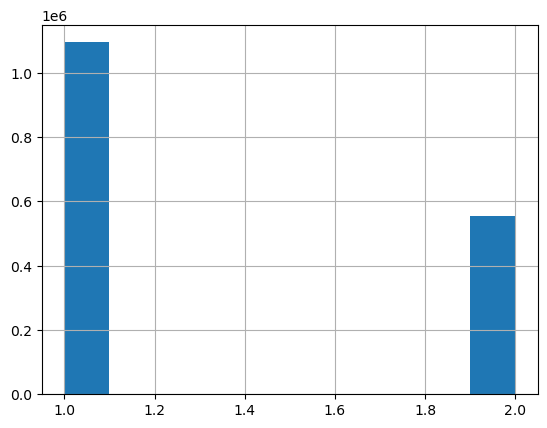

In [45]:
df['DEPT'].hist()

### Variable COSTO_CIF
La variable COSTO_CIF representa el valor del costo incluyendo fletes pero excluyendo gastos de operaciones y nacionalización. A pesar de ser un valor interesante, la columna se registra vacía (probablemente por ser información sensible no se hubiera utilizado en el TFM de cualquier modo).

In [46]:
df['COSTO_CIF'].describe()

count    794002.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: COSTO_CIF, dtype: float64

### Variable VENTAS_MONEDA_ORIGEN
No todas las cuentas registran sus ventas en moneda local, pero aquellos que lo hacen combinan esta cantidad con la columna TASA_CAMBIO. Esta información es sensible y no se utilizará en el TFM.

In [47]:
df['VENTAS_MONEDA_ORIGEN'].describe()

count    794002.000000
mean       6264.247924
std       16425.406708
min     -300442.500000
25%           0.000000
50%           0.000000
75%           0.000000
max      916428.000000
Name: VENTAS_MONEDA_ORIGEN, dtype: float64

### Variable TIPO_PRECIO
La variable TIPO_PRECIO es una variable que descrimina el tipo de precio utilizado en la venta. El equipo de planificación esperaba diferenciar precios de oferta de precios de linea con esta columna, pero a pesar de tener un espacio en la estructura de datos, no se ha podido utilizar aún, y se encuentra vacía.

In [48]:
df['TIPO_PRECIO'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: TIPO_PRECIO, dtype: float64

# Análisis del Juego de Datos: Crítica y Uso
Es interesante ver la cantidad de datos que ha podido acumular el departamento de planificación para el uso posterior. Sin embargo, la cantidad de datos no es necesaria para el nivel de análisis comercial que hace el equipo. El juego de datos tiene demansiadas variables que no se utilizarán nunca, como ser los códigos EAN y el código EAN de color. Adicionalmente hay muchos parámetros repetidos. Por ejemplo, el color aparece inserto en el nombre del producto (que en realidad es un código), en el nombre del color, en el código del color, y una última vez dentro del código que representa el modelo del artículo (a su vez una repetición en muchos casos innecesaria de la variable nombre del modelo). 

Estos juegos de datos se pueden reducir en volumen mucho, sin alterar para nada su valor. En una base de datos normalizada, probablemente con solo guardar el código del producto, se pudiera mover el resto de la información a claves foráneas de bases de atributos como temporada, códigos EAN, etc. En un mundo moderno los archivos no pesan mucho, pero el equipo de planificación no cuenta con las herramientas para procesar archivos de cuatro millones de filas. Inclusive la base de datos Oracle 12C tuvo problemas exportando los archivos. Crear un datamart de archivos limpios para el análisis de series de tiempo, planificación y pronóstico de la demanda tiene todo el sentido del mundo, y probablemente sea el mejor uso de los datos para el equipo de análisis.

¿Qué datos son claves y esenciales? Esa decisión queda no para este ciclo de laboratorio, sino para el próximo donde se decidirá el formato final de los archivos de análisis para el entrenamiento de datos. 